In [1]:
import numpy as np
import pandas as pd
import twosigmafunc
import matplotlib.pyplot as plt

In [2]:
import seaborn
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
train, origin_features = twosigmafunc.preprocess()

In [5]:
train = train.fillna(train.median())

In [5]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [5]:
gp_t22 = train.groupby('technical_22')

In [7]:
gp_t22.mean()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
technical_22,,,,,,,,,,,,,,,,,,,,,
-0.5,1084.283674,942.896091,0.212794,8.495288e+10,-0.230547,-0.018741,0.016451,-0.078311,-2.221473e+06,0.032147,...,-0.017801,-0.090672,-0.090554,-0.076976,-0.153452,0.004293,-0.026118,-0.825820,-0.000074,0.000252
0.0,1100.609701,947.949630,0.237597,1.282540e+12,0.088750,-0.286017,0.934772,-0.015374,-1.028749e+09,-0.032725,...,-0.036243,-0.094872,-0.081667,-0.074956,-0.002533,0.005093,-0.019153,-0.924458,0.000252,0.000220
0.5,1096.854701,946.074580,-13.691469,8.519691e+11,-0.613694,-1.092332,40.914593,0.033220,-1.005064e-02,-0.407628,...,-0.206295,-0.084554,-0.069560,-0.064019,0.309784,0.005949,-0.004824,-1.172962,0.000844,0.000193


In [10]:
gp_t22.std()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
technical_22,,,,,,,,,,,,,,,,,,,,,
-0.5,645.628554,519.521150,10.890799,1.838422e+13,28.879731,18.431871,0.634549,0.219565,4.342770e+08,0.952671,...,0.312316,0.239298,0.240534,0.223088,0.139860,0.111728,0.223019,0.942196,0.028609,0.013988
0.0,624.809010,519.917191,38.554620,1.051663e+14,15.410796,26.497681,76.719482,0.242425,1.008650e+11,2.247143,...,0.486310,0.252411,0.232611,0.225773,0.188392,0.112151,0.204420,0.956095,0.027877,0.019465
0.5,621.395693,519.250842,424.450509,7.255277e+13,93.986218,167.042952,1408.642121,0.267388,5.419305e+00,5.110052,...,0.883191,0.247589,0.222450,0.216348,0.352445,0.112023,0.203857,0.952916,0.027391,0.030737


# Let's see how many category features 

In [15]:
counts = {}
for col in origin_features:
    counts[col] = len(train[col].unique())

derived_0
derived_1
derived_2
derived_3
derived_4
fundamental_0
fundamental_1
fundamental_2
fundamental_3
fundamental_5
fundamental_6
fundamental_7
fundamental_8
fundamental_9
fundamental_10
fundamental_11
fundamental_12
fundamental_13
fundamental_14
fundamental_15
fundamental_16
fundamental_17
fundamental_18
fundamental_19
fundamental_20
fundamental_21
fundamental_22
fundamental_23
fundamental_24
fundamental_25
fundamental_26
fundamental_27
fundamental_28
fundamental_29
fundamental_30
fundamental_31
fundamental_32
fundamental_33
fundamental_34
fundamental_35
fundamental_36
fundamental_37
fundamental_38
fundamental_39
fundamental_40
fundamental_41
fundamental_42
fundamental_43
fundamental_44
fundamental_45
fundamental_46
fundamental_47
fundamental_48
fundamental_49
fundamental_50
fundamental_51
fundamental_52
fundamental_53
fundamental_54
fundamental_55
fundamental_56
fundamental_57
fundamental_58
fundamental_59
fundamental_60
fundamental_61
fundamental_62
fundamental_63
technical_0
te

In [31]:
sorted_counts = twosigmafunc.sort_dict(counts, key=lambda x : x[1], reverse=False)

In [34]:
sorted_counts[:10]

[('technical_34', 3),
 ('technical_22', 3),
 ('technical_10', 3323),
 ('technical_29', 5641),
 ('technical_14', 10260),
 ('technical_43', 26461),
 ('technical_16', 44113),
 ('technical_9', 44642),
 ('technical_18', 71103),
 ('technical_6', 75358)]

seems only `technical_34` and `technical_22` are category features

In [4]:
gp_cates = train.groupby(['technical_22', 'technical_34'])

In [5]:
gp_cates.mean()

id    timestamp  derived_0     derived_1  \
technical_22 technical_34                                                      
-0.5         -0.5          1127.355425   860.573179   0.545727  2.290590e+11   
              0.0          1083.027118   968.653750   0.014406  2.746714e-01   
              0.5          1033.128649  1018.287231   0.015719  6.109132e-02   
 0.0         -0.5          1063.278103   968.133330   0.202264  4.448216e+12   
              0.0          1151.045387   941.829200   0.547492  1.090023e+00   

                           derived_2  derived_3  derived_4  fundamental_0  \
technical_22 technical_34                                                   
-0.5         -0.5          -0.009731   0.045468  -0.020500      -0.211127   
              0.0          -1.252684   0.049385   0.023585      -0.076532   
              0.5           0.135808  -0.161633   0.047893       0.074045   
 0.0         -0.5           0.044041  -0.416674   1.942694      -0.139056   
              0.0           0.152190  -0.261556   1.565129      -0.035375   

                           fundamental_1  fundamental_2    ...     \
technical_22 technical_34                                  ...      
-0.5         -0.5          -6.703287e+06       0.078036    ...      
              0.0          -2.533412e+05       0.085722    ...      
              0.5           1.956524e-01       0.029041    ...      
 0.0         -0.5          -5.746534e+09      -0.088694    ...      
              0.0           4.187698e-02      -0.018904    ...      

                           technical_36  technical_37  technical_38  \
technical_22 technical_34                                             
-0.5         -0.5             -0.016320     -0.101642     -0.101068   
              0.0             -0.006407     -0.098429     -0.091693   
              0.5             -0.030254     -0.072998     -0.079753   
 0.0         -0.5             -0.106677     -0.116783     -0.086224   
              0.0              0.008197     -0.091531     -0.087089   

                           technical_39  technical_40  technical_41  \
technical_22 technical_34                                             
-0.5         -0.5             -0.086080     -0.189163      0.004297   
              0.0             -0.082463     -0.145234      0.005470   
              0.5             -0.063284     -0.118341      0.003448   
 0.0         -0.5             -0.090996     -0.025983      0.006536   
              0.0             -0.076603     -0.013048      0.005087   

                           technical_42  technical_43  technical_44         y  
technical_22 technical_34                                                      
-0.5         -0.5             -0.044077     -0.839089     -0.000811  0.000259  
              0.0             -0.022914     -0.818600      0.000760  0.000255  
              0.5             -0.008374     -0.817128     -0.000097  0.000241  
 0.0         -0.5             -0.039513     -1.046430     -0.000383  0.000221  
              0.0             -0.014491     -0.864735      0.000343  0.000226  

[5 rows x 109 columns]

# Linear Corref in different groups 

In [6]:
values = [-0.5, 0, 0.5]
corref = {}
for t22_value in values:
    for t34_value in values:
        x = train.loc[(train.technical_22 == t22_value) & (train.technical_34 == t34_value)]
        corref[(t22_value, t34_value)] = twosigmafunc.feature_corref(x, 'y', origin_features)
        print('processing', t22_value, t34_value)

/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


processing -0.5 -0.5
processing -0.5 0
processing -0.5 0.5
processing 0 -0.5
processing 0 0
processing 0 0.5
processing 0.5 -0.5
processing 0.5 0
processing 0.5 0.5


In [7]:
features_groups = {}
for key in corref.keys():
    print(key)
    best_features = [col for col in corref[key][:5] if col[0] not in ['technical_22', 'technical_34']][:2]
    features_groups[key] = [best_features[0][0], best_features[1][0]]
    print(best_features)

(0.5, -0.5)
[('fundamental_14', -0.0088358897004402158), ('fundamental_23', -0.0087673106250023194)]
(0.5, 0)
[('fundamental_51', 0.011901245177861104), ('derived_4', 0.0074380590633454239)]
(0, -0.5)
[('technical_20', -0.020661451132074474), ('technical_14', -0.0069656369913574587)]
(0, 0.5)
[('fundamental_2', 0.0076004432572126272), ('technical_30', 0.031828576173331465)]
(0, 0)
[('technical_20', -0.018375491495355476), ('technical_30', 0.012091473483376011)]
(-0.5, 0)
[('technical_20', -0.023838571297583232), ('technical_14', -0.0069090630788274012)]
(-0.5, -0.5)
[('technical_20', -0.026938698396285009), ('technical_30', 0.016293959725609947)]
(0.5, 0.5)
[('technical_30', 0.024695513679455283), ('technical_20', -0.022300057631401301)]
(-0.5, 0.5)
[('fundamental_2', 0.0097173480804507543), ('technical_30', 0.031298077922583517)]


In [8]:
features_groups

{(-0.5, -0.5): ['technical_20', 'technical_30'],
 (-0.5, 0): ['technical_20', 'technical_14'],
 (-0.5, 0.5): ['fundamental_2', 'technical_30'],
 (0, -0.5): ['technical_20', 'technical_14'],
 (0, 0): ['technical_20', 'technical_30'],
 (0, 0.5): ['fundamental_2', 'technical_30'],
 (0.5, -0.5): ['fundamental_14', 'fundamental_23'],
 (0.5, 0): ['fundamental_51', 'derived_4'],
 (0.5, 0.5): ['technical_30', 'technical_20']}

In [20]:
lr_features = []
for col in features_groups.values():
    lr_features.extend(col)

In [22]:
lr_features = list(set(lr_features))

In [23]:
lr_features

['derived_4',
 'technical_14',
 'fundamental_2',
 'technical_30',
 'fundamental_14',
 'fundamental_23',
 'fundamental_51',
 'technical_20']

# Train those linear_models 

In [9]:
t22_dummy = pd.get_dummies(train.technical_22, prefix='t22')
train = pd.concat([train, t22_dummy], axis=1)
t34_dummy = pd.get_dummies(train.technical_34, prefix='t34')
train = pd.concat([train, t34_dummy], axis=1)
train.drop(['t22_0.5', 't34_0.5'], axis=1, inplace=True)

In [24]:
X_train, y_train, X_test, y_test = twosigmafunc.split_data(train,  ['t22_0.0', 't34_0.0', 't22_-0.5', 't34_-0.5', 
                                                                    'timestamp', 'technical_22', 'technical_34'] + lr_features)

In [11]:
low_y_cut = -0.075
high_y_cut = 0.075
y_is_above_cut = (y_train > high_y_cut)
y_is_below_cut = (y_train < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)

In [18]:
X_train.head()

,technical_20,technical_12,technical_30,technical_27,technical_35,fundamental_53,fundamental_14,fundamental_11,t22_0.0,t34_0.0,t22_-0.5,t34_-0.5,fundamental_18,timestamp,technical_22,technical_34,"(-0.5, -0.5)","(0.5, 0.5)"
0,0.000000,-0.000058,0.0,1.427469,0.937880,0.208402,-0.055747,1.412742,1,1,0,0,0.404180,0,0.0,0.0,0.000373,0.000078
1,0.000000,-0.000058,0.0,0.154613,0.232154,-0.281368,-0.034664,-0.202247,0,0,1,0,-0.208746,0,-0.5,0.5,0.000373,0.000078
2,0.006942,-0.000058,0.0,0.378332,0.372688,-0.026392,-0.031116,-0.899515,0,0,1,1,0.077977,0,-0.5,-0.5,-0.000835,-0.000537
3,0.006766,-0.000058,0.0,1.023713,0.751021,0.085835,0.018161,0.019866,1,0,0,1,-0.310245,0,0.0,-0.5,-0.000805,-0.000521
4,0.006236,-0.000058,0.0,0.741545,0.595206,0.082511,0.139590,-0.167811,0,0,1,0,0.021833,0,-0.5,0.5,-0.000712,-0.000474


In [30]:
features = twosigmafunc.origin_features(X_train)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
linear_models = []
meta_features = []
for key, value in features_groups.items():
    print(key, value)
    t22, t34 = key
    ind = X_train.loc[(X_train.technical_22 == t22) & (X_train.technical_34 == t34)].index
    
    print('size:', len(ind))
    meta_name = str(key)
    clf = LinearRegression(n_jobs=-1, normalize=True)
    clf.fit(X_train.loc[ind, value], y_train.loc[ind])
    linear_models.append(clf)
    X_train[meta_name] = clf.predict(X_train[value]).clip(low_y_cut, high_y_cut)
    X_test[meta_name] = clf.predict(X_test[value]).clip(low_y_cut, high_y_cut)

(-0.5, -0.5) ['technical_20', 'technical_30']
size: 118789
(0.5, 0.5) ['technical_30', 'technical_20']
size: 98880
(0, 0.5) ['fundamental_2', 'technical_30']
size: 93331
(-0.5, 0) ['technical_20', 'technical_14']
size: 79246
(0, 0) ['technical_20', 'technical_30']
size: 96501
(0.5, 0) ['fundamental_51', 'derived_4']
size: 89986
(0.5, -0.5) ['fundamental_14', 'fundamental_23']
size: 75987
(-0.5, 0.5) ['fundamental_2', 'technical_30']
size: 75284
(0, -0.5) ['technical_20', 'technical_14']
size: 78294


# Let's train stacking model  on linear space

In [27]:
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
features = [col for col in features if col not in ['technical_22', 'technical_34']]

In [33]:
features

['t22_0.0',
 't34_0.0',
 't22_-0.5',
 't34_-0.5',
 'derived_4',
 'technical_14',
 'fundamental_2',
 'technical_30',
 'fundamental_14',
 'fundamental_23',
 'fundamental_51',
 'technical_20',
 '(-0.5, -0.5)',
 '(0.5, 0.5)',
 '(0, 0.5)',
 '(-0.5, 0)',
 '(0, 0)',
 '(0.5, 0)',
 '(0.5, -0.5)',
 '(-0.5, 0.5)',
 '(0, -0.5)']

In [28]:
etr = ExtraTreesRegressor(n_estimators=100, n_jobs=-1, max_depth=6, max_features=0.9, min_samples_leaf=10, random_state=11)

In [34]:
etr.fit(X_train[features], y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.9, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=10, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=11, verbose=0, warm_start=False)

In [35]:
pred = etr.predict(X_test[features])

In [36]:
twosigmafunc.R_score(pred, y_test)

0.023790084927076998

In [38]:
imp = pd.DataFrame({'feature': features, 'weight':etr.feature_importances_}).sort_values(
    'weight', ascending=False) 

In [40]:
imp[:10]

,feature,weight
12,"(-0.5, -0.5)",0.099785
13,"(0.5, 0.5)",0.092121
16,"(0, 0)",0.079746
15,"(-0.5, 0)",0.078091
20,"(0, -0.5)",0.077169
9,fundamental_23,0.058972
14,"(0, 0.5)",0.056580
0,t22_0.0,0.056188
7,technical_30,0.052951
11,technical_20,0.045098


### See patterns 

In [41]:
min_stamp = X_test.timestamp.min()
max_stamp = X_test.timestamp.max()

In [42]:
reward = []
y_true_acc = []
y_pred_acc = []
stamp = min_stamp
while stamp <= max_stamp:
    test = X_test.loc[X_test.timestamp == stamp, features]
    y_true = y_test.loc[X_test.timestamp == stamp]
    y_pred = etr.predict(test)
    y_true_acc.extend(list(y_true))
    y_pred_acc.extend(list(y_pred))
    reward.append(twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc)))
    stamp += 1
    if stamp % 100 == 0:
        print(stamp, reward[-1])

1000 -0.016091030544
1100 -0.0168880682811
1200 -0.00390829702023
1300 -0.00601284643834
1400 -0.0211615228029
1500 -0.0121171179547
1600 0.0292158650679
1700 0.02615909934
1800 0.0239310928201


In [54]:
score = pd.read_csv('Linear_R_score.csv')

(-0.15, 0.07)

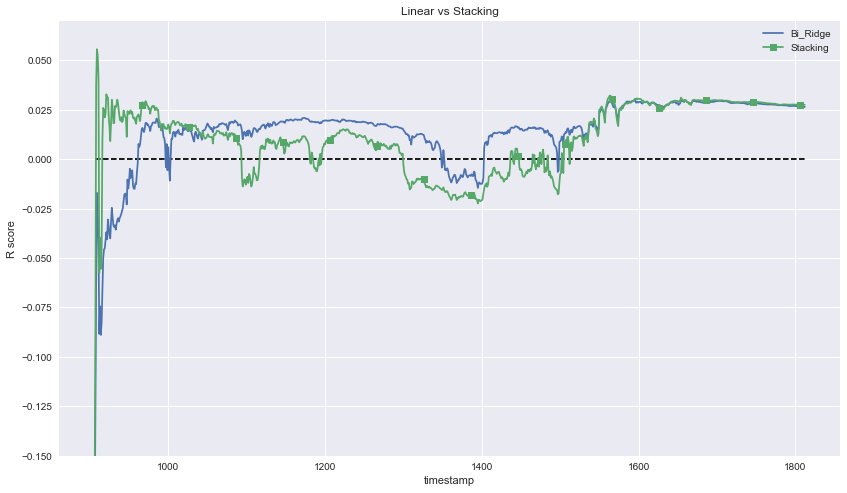

In [66]:
plt.title('Linear vs Stacking')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for col in score.columns[1:2]:
    plt.plot(range(min_stamp, max_stamp + 1), np.array(score[col]), label=col)
plt.plot(range(min_stamp, max_stamp + 1), reward, marker='s', markevery=60, label='Stacking')
plt.legend(loc='best')
plt.ylim(-0.15, 0.07)

# Using Ridge 

In [67]:
linear_models = []
meta_features = []
for key, value in combinations.items():
    print(key, value)
    meta_name = str(key)
    clf = Ridge(normalize=True)
    clf.fit(X_train[value], y_train)
    linear_models.append(clf)
    X_train[meta_name] = clf.predict(X_train[value]).clip(low_y_cut, high_y_cut)
    X_test[meta_name] = clf.predict(X_test[value]).clip(low_y_cut, high_y_cut)

(0, 0) ['technical_20', 'technical_35']
(0.5, 0) ['fundamental_11', 'technical_20']
(0.5, -0.5) ['fundamental_53', 'fundamental_14']
(-0.5, 0) ['technical_20', 'technical_30']
(-0.5, -0.5) ['technical_20', 'technical_12']
(0, -0.5) ['technical_20', 'technical_27']


In [69]:
etr.fit(X_train[features], y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.9, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=10, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [70]:
pred = etr.predict(X_test[features])
twosigmafunc.R_score(pred, y_test)

0.02859741993145842

In [71]:
reward_ri = []
y_true_acc = []
y_pred_acc = []
stamp = min_stamp
while stamp <= max_stamp:
    test = X_test.loc[X_test.timestamp == stamp, features]
    y_true = y_test.loc[X_test.timestamp == stamp]
    y_pred = etr.predict(test)
    y_true_acc.extend(list(y_true))
    y_pred_acc.extend(list(y_pred))
    reward_ri.append(twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc)))
    stamp += 1
    if stamp % 100 == 0:
        print(stamp, reward_ri[-1])

1000 0.017029952302
1100 -0.0131836983879
1200 0.00886016414197
1300 0.00430314264604
1400 -0.0209400293417
1500 -0.011698833925
1600 0.0311070464829
1700 0.030636020112
1800 0.0287583661856


(-0.15, 0.07)

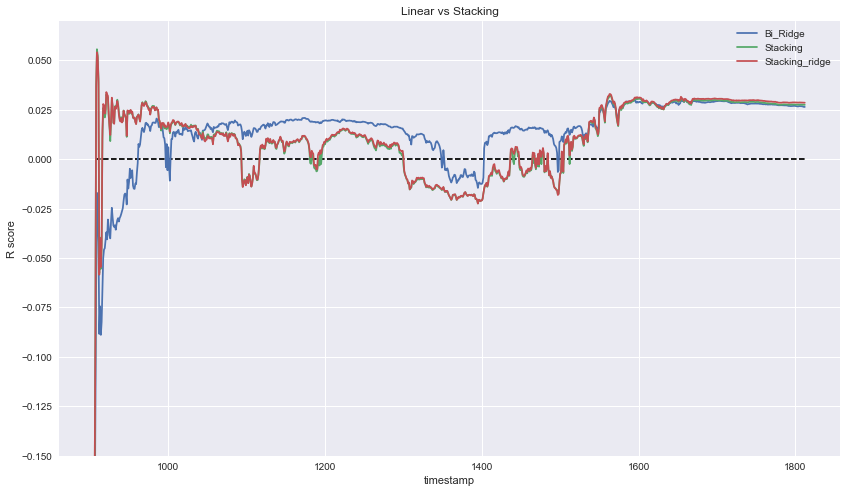

In [72]:
plt.title('Linear vs Stacking')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for col in score.columns[1:2]:
    plt.plot(range(min_stamp, max_stamp + 1), np.array(score[col]), label=col)
plt.plot(range(min_stamp, max_stamp + 1), reward, label='Stacking')
plt.plot(range(min_stamp, max_stamp + 1), reward_ri, label='Stacking_ridge')
plt.legend(loc='best')
plt.ylim(-0.15, 0.07)

no much difference between `linear` and `ridge`

# Use 1 feature for linear models 

In [76]:
combinations = {
 (-0.5, -0.5): ['technical_20'],
 (0.5, -0.5): ['fundamental_53'],
 (0.5, 0): ['fundamental_11'],
(-0.5, 0.5): ['technical_30']}

In [77]:
linear_models = []
meta_features = []
for key, value in combinations.items():
    print(key, value)
    meta_name = str(key)
    clf = LinearRegression(n_jobs=-1, normalize=True)
    clf.fit(X_train[value].values.reshape(-1, 1), y_train)
    linear_models.append(clf)
    X_train[meta_name] = clf.predict(X_train[value].values.reshape(-1, 1)).clip(low_y_cut, high_y_cut)
    X_test[meta_name] = clf.predict(X_test[value].values.reshape(-1, 1)).clip(low_y_cut, high_y_cut)

(-0.5, 0.5) ['technical_30']
(0.5, 0) ['fundamental_11']
(-0.5, -0.5) ['technical_20']
(0.5, -0.5) ['fundamental_53']


In [75]:
features

['technical_20',
 'technical_12',
 'technical_30',
 'technical_27',
 'technical_35',
 'fundamental_53',
 'fundamental_14',
 'fundamental_11',
 't22_0.0',
 't34_0.0',
 't22_-0.5',
 't34_-0.5',
 '(0, 0)',
 '(0.5, 0)',
 '(0.5, -0.5)',
 '(-0.5, 0)',
 '(-0.5, -0.5)',
 '(0, -0.5)']

In [78]:
features_uni = [
 'technical_20',
 'technical_30',
 'fundamental_53',
 'fundamental_11',
 't22_0.0',
 't34_0.0',
 't22_-0.5',
 't34_-0.5',
 '(-0.5, 0.5)',
 '(0.5, 0)',
 '(-0.5, -0.5)',
 '(0.5, -0.5)']

In [80]:
etr.fit(X_train[features_uni], y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.9, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=10, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=11, verbose=0, warm_start=False)

In [81]:
pred = etr.predict(X_test[features_uni])
twosigmafunc.R_score(pred, y_test)

0.023212708494453158

In [82]:
reward_uni = []
y_true_acc = []
y_pred_acc = []
stamp = min_stamp
while stamp <= max_stamp:
    test = X_test.loc[X_test.timestamp == stamp, features_uni]
    y_true = y_test.loc[X_test.timestamp == stamp]
    y_pred = etr.predict(test)
    y_true_acc.extend(list(y_true))
    y_pred_acc.extend(list(y_pred))
    reward_uni.append(twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc)))
    stamp += 1
    if stamp % 100 == 0:
        print(stamp, reward_uni[-1])

1000 -0.0131016592031
1100 -0.0230794409052
1200 -0.0138337371508
1300 -0.0141877452261
1400 -0.0246030464797
1500 -0.0174104294227
1600 0.0260206034135
1700 0.0251770280351
1800 0.0232876497062


(-0.15, 0.07)

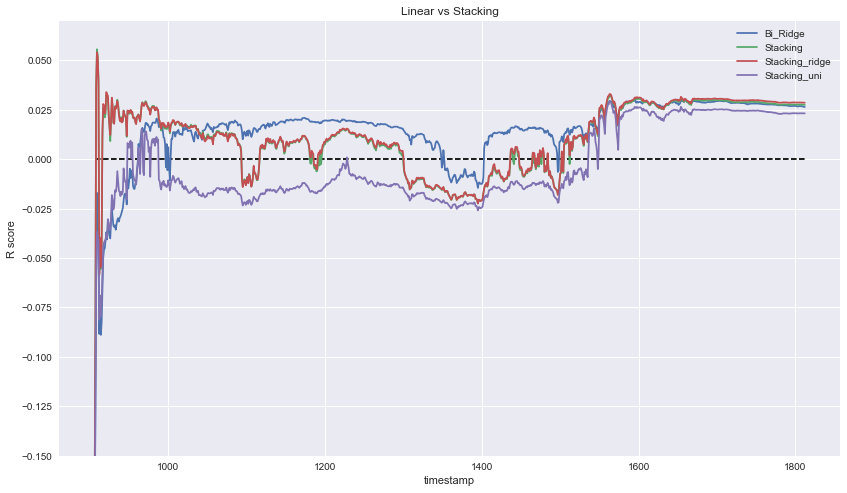

In [83]:
plt.title('Linear vs Stacking')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for col in score.columns[1:2]:
    plt.plot(range(min_stamp, max_stamp + 1), np.array(score[col]), label=col)
plt.plot(range(min_stamp, max_stamp + 1), reward, label='Stacking')
plt.plot(range(min_stamp, max_stamp + 1), reward_ri, label='Stacking_ridge')
plt.plot(range(min_stamp, max_stamp + 1), reward_uni, label='Stacking_uni')
plt.legend(loc='best')
plt.ylim(-0.15, 0.07)

binary is better!

# Add `y_lr_1` and `y_lr_2 `

In [84]:
del train

In [ ]:
X_train['tec20-30'] = X_train.technical_20 - X_train.technical_30
X_test['tec20-30'] = X_train.technical_20 - X_train.technical_30

# See how to fillna with groups 

In [15]:
train.technical_22.isnull().sum()

0

In [16]:
train.technical_34.isnull().sum()

0

In [10]:
sub_train = train[:10]

In [11]:
sub_train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [12]:
sub_train.values

array([[  1.00000000e+01,   0.00000000e+00,   3.70326221e-01, ...,
         -2.00000000e+00,              nan,  -1.17534492e-02],
       [  1.10000000e+01,   0.00000000e+00,   1.47646843e-02, ...,
         -2.00000000e+00,              nan,  -1.24013668e-03],
       [  1.20000000e+01,   0.00000000e+00,  -1.06217954e-02, ...,
         -2.00000000e+00,              nan,  -2.09395438e-02],
       ..., 
       [  3.80000000e+01,   0.00000000e+00,   3.00062418e-01, ...,
         -2.00000000e+00,              nan,   1.58029143e-02],
       [  3.90000000e+01,   0.00000000e+00,  -3.51085421e-03, ...,
         -2.00000000e+00,              nan,  -2.75933668e-02],
       [  4.00000000e+01,   0.00000000e+00,  -8.33296925e-02, ...,
         -2.00000000e+00,              nan,   6.66242279e-03]], dtype=float32)

In [26]:
for col in origin_features:
    sub_train[col].fillna(sub_train.groupby(['technical_34'])[col].transform("mean"), inplace=True)

derived_0
derived_1
derived_2
derived_3
derived_4
fundamental_0


/usr/local/lib/python3.4/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


fundamental_1
fundamental_2
fundamental_3
fundamental_5
fundamental_6
fundamental_7
fundamental_8
fundamental_9
fundamental_10
fundamental_11
fundamental_12
fundamental_13
fundamental_14
fundamental_15
fundamental_16
fundamental_17
fundamental_18
fundamental_19
fundamental_20
fundamental_21
fundamental_22
fundamental_23
fundamental_24
fundamental_25
fundamental_26
fundamental_27
fundamental_28
fundamental_29
fundamental_30
fundamental_31
fundamental_32
fundamental_33
fundamental_34
fundamental_35
fundamental_36
fundamental_37
fundamental_38
fundamental_39
fundamental_40
fundamental_41
fundamental_42
fundamental_43
fundamental_44
fundamental_45
fundamental_46
fundamental_47
fundamental_48
fundamental_49
fundamental_50
fundamental_51
fundamental_52
fundamental_53
fundamental_54
fundamental_55
fundamental_56
fundamental_57
fundamental_58
fundamental_59
fundamental_60
fundamental_61
fundamental_62
fundamental_63
technical_0
technical_1
technical_2
technical_3
technical_5
technical_6
techni

In [27]:
sub_train

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,0.138242,0.067212,-1.206004,-0.355480,-0.261329,0.178495,0.379278,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338
5,27,0,0.346856,0.166239,-6.080701,-0.992249,-0.125916,0.345812,0.379278,-0.584239,...,-0.379366,NaN,NaN,NaN,-0.001957,NaN,NaN,-2.0,NaN,0.031425
6,31,0,0.072036,0.014931,0.152601,0.014063,0.351763,-0.193205,0.188372,0.690013,...,1.232558,NaN,NaN,NaN,0.350685,NaN,NaN,-2.0,NaN,-0.032895
7,38,0,0.300062,0.071251,-0.074451,-0.065292,-0.011286,0.026365,0.210249,0.167494,...,0.242646,NaN,NaN,NaN,-0.168077,NaN,NaN,-2.0,NaN,0.015803
8,39,0,-0.003511,-0.034270,0.082372,-0.023937,-0.025750,0.007815,0.263451,-0.241212,...,0.186175,NaN,NaN,NaN,-0.300842,NaN,NaN,-2.0,NaN,-0.027593
9,40,0,-0.083330,0.081935,-2.048438,-0.206856,-0.839563,-0.234100,-0.291853,-5.722336,...,-0.021965,NaN,NaN,NaN,-0.386579,NaN,NaN,-2.0,NaN,0.006662


In [25]:
train[:10]

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338
5,27,0,0.346856,0.166239,-6.080701,-0.992249,-0.125916,0.345812,NaN,-0.584239,...,-0.379366,NaN,NaN,NaN,-0.001957,NaN,NaN,-2.0,NaN,0.031425
6,31,0,0.072036,0.014931,NaN,0.014063,NaN,-0.193205,NaN,NaN,...,1.232558,NaN,NaN,NaN,0.350685,NaN,NaN,-2.0,NaN,-0.032895
7,38,0,0.300062,0.071251,-0.074451,-0.065292,-0.011286,0.026365,0.210249,0.167494,...,0.242646,NaN,NaN,NaN,-0.168077,NaN,NaN,-2.0,NaN,0.015803
8,39,0,-0.003511,-0.034270,0.082372,-0.023937,-0.025750,0.007815,0.263451,-0.241212,...,0.186175,NaN,NaN,NaN,-0.300842,NaN,NaN,-2.0,NaN,-0.027593
9,40,0,-0.083330,0.081935,-2.048438,-0.206856,-0.839563,-0.234100,-0.291853,-5.722336,...,-0.021965,NaN,NaN,NaN,-0.386579,NaN,NaN,-2.0,NaN,0.006662


seems only work with one groupby col

# How long does it take on whole data? 

In [28]:
import timeit

In [32]:
t0 = timeit.timeit
for col in origin_features:
    train[col] = train[col].fillna(gp_t34[col].transform("mean"))
t1 = timeit.timeit

in a minite

In [34]:
gp_t22 = train.groupby('technical_22')

In [29]:
gp_t34 = train.groupby('technical_34')

In [59]:
t22_larger = gp_t22.std().mean() - gp_t34.std().mean()

In [60]:
t22_feature = t22_larger[t22_larger < 0].index

In [61]:
t34_feature = t22_larger.drop(t22_feature).index

In [62]:
t22_feature = [col for col in t22_feature if col not in ['technical_22', 'technical_34', 'id', 'timestamp', 'y']]

In [63]:
t34_feature = [col for col in t34_feature if col not in ['technical_22', 'technical_34', 'id', 'timestamp', 'y']]

In [64]:
t34_feature

['derived_2',
 'derived_3',
 'fundamental_0',
 'fundamental_1',
 'fundamental_12',
 'fundamental_24',
 'fundamental_25',
 'fundamental_28',
 'fundamental_3',
 'fundamental_32',
 'fundamental_33',
 'fundamental_36',
 'fundamental_38',
 'fundamental_39',
 'fundamental_41',
 'fundamental_44',
 'fundamental_46',
 'fundamental_49',
 'fundamental_56',
 'fundamental_58',
 'fundamental_61',
 'fundamental_7',
 'fundamental_8',
 'technical_0',
 'technical_12',
 'technical_18',
 'technical_25',
 'technical_28',
 'technical_3',
 'technical_31',
 'technical_32',
 'technical_33',
 'technical_37',
 'technical_39',
 'technical_42',
 'technical_5']

In [65]:
t22_feature

['derived_0',
 'derived_1',
 'derived_4',
 'fundamental_10',
 'fundamental_11',
 'fundamental_13',
 'fundamental_14',
 'fundamental_15',
 'fundamental_16',
 'fundamental_17',
 'fundamental_18',
 'fundamental_19',
 'fundamental_2',
 'fundamental_20',
 'fundamental_21',
 'fundamental_22',
 'fundamental_23',
 'fundamental_26',
 'fundamental_27',
 'fundamental_29',
 'fundamental_30',
 'fundamental_31',
 'fundamental_34',
 'fundamental_35',
 'fundamental_37',
 'fundamental_40',
 'fundamental_42',
 'fundamental_43',
 'fundamental_45',
 'fundamental_47',
 'fundamental_48',
 'fundamental_5',
 'fundamental_50',
 'fundamental_51',
 'fundamental_52',
 'fundamental_53',
 'fundamental_54',
 'fundamental_55',
 'fundamental_57',
 'fundamental_59',
 'fundamental_6',
 'fundamental_60',
 'fundamental_62',
 'fundamental_63',
 'fundamental_9',
 'technical_1',
 'technical_10',
 'technical_11',
 'technical_13',
 'technical_14',
 'technical_16',
 'technical_17',
 'technical_19',
 'technical_2',
 'technical_2

In [57]:
gp_t22.std()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
technical_22,,,,,,,,,,,,,,,,,,,,,
-0.5,645.628554,519.521150,10.938387,1.838488e+13,28.881748,18.432194,17.259764,0.219686,6.027424e+08,0.959341,...,0.312348,0.239122,0.240359,0.222952,0.139891,0.111726,0.223008,0.942206,0.028609,0.013988
0.0,624.809010,519.917191,38.580242,1.051660e+14,15.414596,26.497837,77.635847,0.242579,1.008643e+11,2.247872,...,0.486326,0.252223,0.232458,0.225627,0.188395,0.112148,0.204414,0.956006,0.027877,0.019465
0.5,621.395693,519.250842,424.438876,7.255248e+13,93.986369,167.042788,1408.575655,0.267845,7.306966e+08,5.109035,...,0.883195,0.247405,0.222312,0.216225,0.352361,0.112018,0.203865,0.952392,0.027390,0.030737


In [58]:
gp_t34.std()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
technical_34,,,,,,,,,,,,,,,,,,,,,
-0.5,628.173075,519.543698,387.554613,1.066250e+14,16.185400,21.135446,1298.226001,0.220321,1.007155e+11,4.057551,...,0.528906,0.273009,0.246940,0.246292,0.343941,0.111510,0.242800,0.966754,0.027496,0.022865
0.0,634.327724,519.240119,159.631020,5.894007e+13,95.622799,13.489698,488.841168,0.219669,1.390344e+07,3.831787,...,0.620577,0.241999,0.229720,0.219095,0.279228,0.112010,0.204950,0.956615,0.027873,0.022183
0.5,628.943363,519.856271,54.748925,4.153342e+13,20.348933,167.011531,175.239050,0.237089,4.047384e+00,0.801616,...,0.669042,0.220151,0.218515,0.196411,0.296914,0.112373,0.178496,0.952512,0.028529,0.022208


# Let's fill it 

In [66]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,-0.092491,-0.083389,-0.074990,-0.414776,0.005634,-0.012823,-2.0,0.000456,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,-0.076664,-0.076388,-0.061450,-0.273607,0.004962,-0.002897,-2.0,0.000848,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,-0.104106,-0.085064,-0.082283,-0.175710,0.005118,-0.035272,-2.0,-0.000178,-0.020940
3,25,0,0.138242,0.067212,-1.206004,-0.355480,-0.261329,0.178495,0.379278,-0.007262,...,1.035936,-0.104106,-0.085064,-0.082283,-0.211506,0.005118,-0.035272,-2.0,-0.000178,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,-0.076664,-0.076388,-0.061450,-0.001957,0.004962,-0.002897,0.0,0.000848,-0.007338


# Creat dummy features 

In [41]:
t22_dummy = pd.get_dummies(train.technical_22, prefix='t22')
train = pd.concat([train, t22_dummy], axis=1)

In [43]:
t34_dummy = pd.get_dummies(train.technical_34, prefix='t34')
train = pd.concat([train, t34_dummy], axis=1)

In [45]:
train.drop(['technical_22', 'technical_34'], axis=1, inplace=True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710756 entries, 0 to 1710755
Columns: 115 entries, id to t34_0.5
dtypes: float32(107), int16(2), uint8(6)
memory usage: 727.7 MB


In [48]:
origin_features = twosigmafunc.origin_features(train)

In [50]:
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
etr = ExtraTreesRegressor(n_estimators=40, max_depth=4, max_features='sqrt', min_samples_leaf=10, random_state=11, n_jobs=-1)

In [52]:
X_train, y_train, X_test, y_test = twosigmafunc.split_data(train, origin_features)

In [54]:
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=10,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=40, n_jobs=-1, oob_score=False, random_state=11,
          verbose=0, warm_start=False)

In [55]:
pred = etr.predict(X_test)

In [56]:
twosigmafunc.R_score(pred, y_test)

0.010193361807766315

In [57]:
pred = etr.predict(X_train)
twosigmafunc.R_score(pred, y_train)

0.021163241202072258

In [60]:
imp = pd.DataFrame({'feature':origin_features, 'important':etr.feature_importances_}).sort_values('important', ascending=False)

,feature,important
55,fundamental_51,0.083280
15,fundamental_11,0.078693
92,technical_30,0.069579
85,technical_20,0.043647
82,technical_17,0.037244
101,technical_40,0.030443
73,technical_6,0.029407
70,technical_2,0.028661
84,technical_19,0.028472
74,technical_7,0.027783


In [64]:
imp[-20:]

,feature,important
81,technical_16,0.000688
105,technical_44,0.000672
40,fundamental_36,0.000557
39,fundamental_35,0.000440
69,technical_1,0.000065
42,fundamental_38,0.000000
49,fundamental_45,0.000000
38,fundamental_34,0.000000
51,fundamental_47,0.000000
31,fundamental_27,0.000000


In [62]:
for col in list(t22_dummy.columns) + list(t34_dummy.columns):
    print(imp.loc[imp.feature == col])

      feature  important
106  t22_-0.5   0.001463
     feature  important
107  t22_0.0   0.004299
     feature  important
108  t22_0.5   0.001567
      feature  important
109  t34_-0.5   0.011455
     feature  important
110  t34_0.0   0.001859
     feature  important
111  t34_0.5   0.003361
